In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/colab_notebooks/algovera/defi/v2

/content/drive/MyDrive/colab_notebooks/algovera/defi/v2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/aave_V2_mainnet_2021_2022.csv')

In [5]:
df.columns

Index(['id', 'symbol', 'aEmissionPerSecond', 'decimals', 'totalATokenSupply',
       'vEmissionPerSecond', 'totalCurrentVariableDebt', 'utilizationRate',
       'totalLiquidity', 'liquidityRate', 'variableBorrowRate',
       'availableLiquidity', 'Timestamp', 'priceInEth', 'pool_id'],
      dtype='object')

In [6]:
df.head(5)

,id,symbol,aEmissionPerSecond,decimals,totalATokenSupply,vEmissionPerSecond,totalCurrentVariableDebt,utilizationRate,totalLiquidity,liquidityRate,variableBorrowRate,availableLiquidity,Timestamp,priceInEth,pool_id
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc20xb5...,WETH,0.0,18,8.266407e+04,0.0,1.196723e+04,0.146583,8.265927e+04,0.002432,0.018047,7.054282e+04,1610000000,1.000000,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5
1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480xb5...,USDC,0.0,6,4.045025e+07,0.0,1.010423e+07,0.882116,4.036360e+07,0.056981,0.039216,4.758243e+06,1610000000,0.000821,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5
2,0x6b175474e89094c44da98b954eedeac495271d0f0xb5...,DAI,0.0,18,2.118922e+07,0.0,6.409470e+06,0.793702,2.114079e+07,0.059119,0.039706,4.361307e+06,1610000000,0.000824,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5
3,0xdac17f958d2ee523a2206206994597c13d831ec70xb5...,USDT,0.0,6,1.835719e+07,0.0,4.792608e+06,0.920945,1.829141e+07,0.089307,0.167269,1.446027e+06,1610000000,0.000827,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5
4,0x0000000000085d4780b73119b644ae5ecd22b3760xb5...,TUSD,0.0,18,4.921945e+05,0.0,7.969769e+04,1.000000,4.903346e+05,0.163313,0.790000,0.000000e+00,1610000000,0.000826,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5


In [7]:
df['datetime'] = pd.to_datetime(df['Timestamp'], 
                                utc=True, 
                                unit='s')

In [8]:
df['Timestamp'].value_counts()

1610000000    6
1638116000    6
1638123200    6
1638126800    6
1638130400    6
             ..
1624076000    6
1624079600    6
1624083200    6
1624086800    6
1652206400    6
Name: Timestamp, Length: 11725, dtype: int64

In [9]:
df['symbol'].value_counts()

WETH    11725
USDC    11725
DAI     11725
USDT    11725
TUSD    11725
GUSD    11725
Name: symbol, dtype: int64

In [10]:
df_dai = df[df['symbol'] == 'DAI']
df_usdc = df[df['symbol'] == 'USDC']
df_usdt = df[df['symbol'] == 'USDT']
df_eth = df[df['symbol'] == 'WETH']
df_tusd = df[df['symbol'] == 'TUSD']
df_gusd = df[df['symbol'] == 'GUSD']

In [11]:
toplot = ['aEmissionPerSecond', 'decimals', 'totalATokenSupply',
          'vEmissionPerSecond', 'totalCurrentVariableDebt', 'utilizationRate',
          'totalLiquidity', 'liquidityRate', 'variableBorrowRate',
          'availableLiquidity', 'priceInEth']

In [12]:
def plot(df):
    fig, axes = plt.subplots(4, 3, figsize=(30,20))

    for i, top in enumerate(toplot):
        axes.flatten()[i].plot(df['datetime'], df[top])
        axes.flatten()[i].title.set_text(top)
        plt.tight_layout()

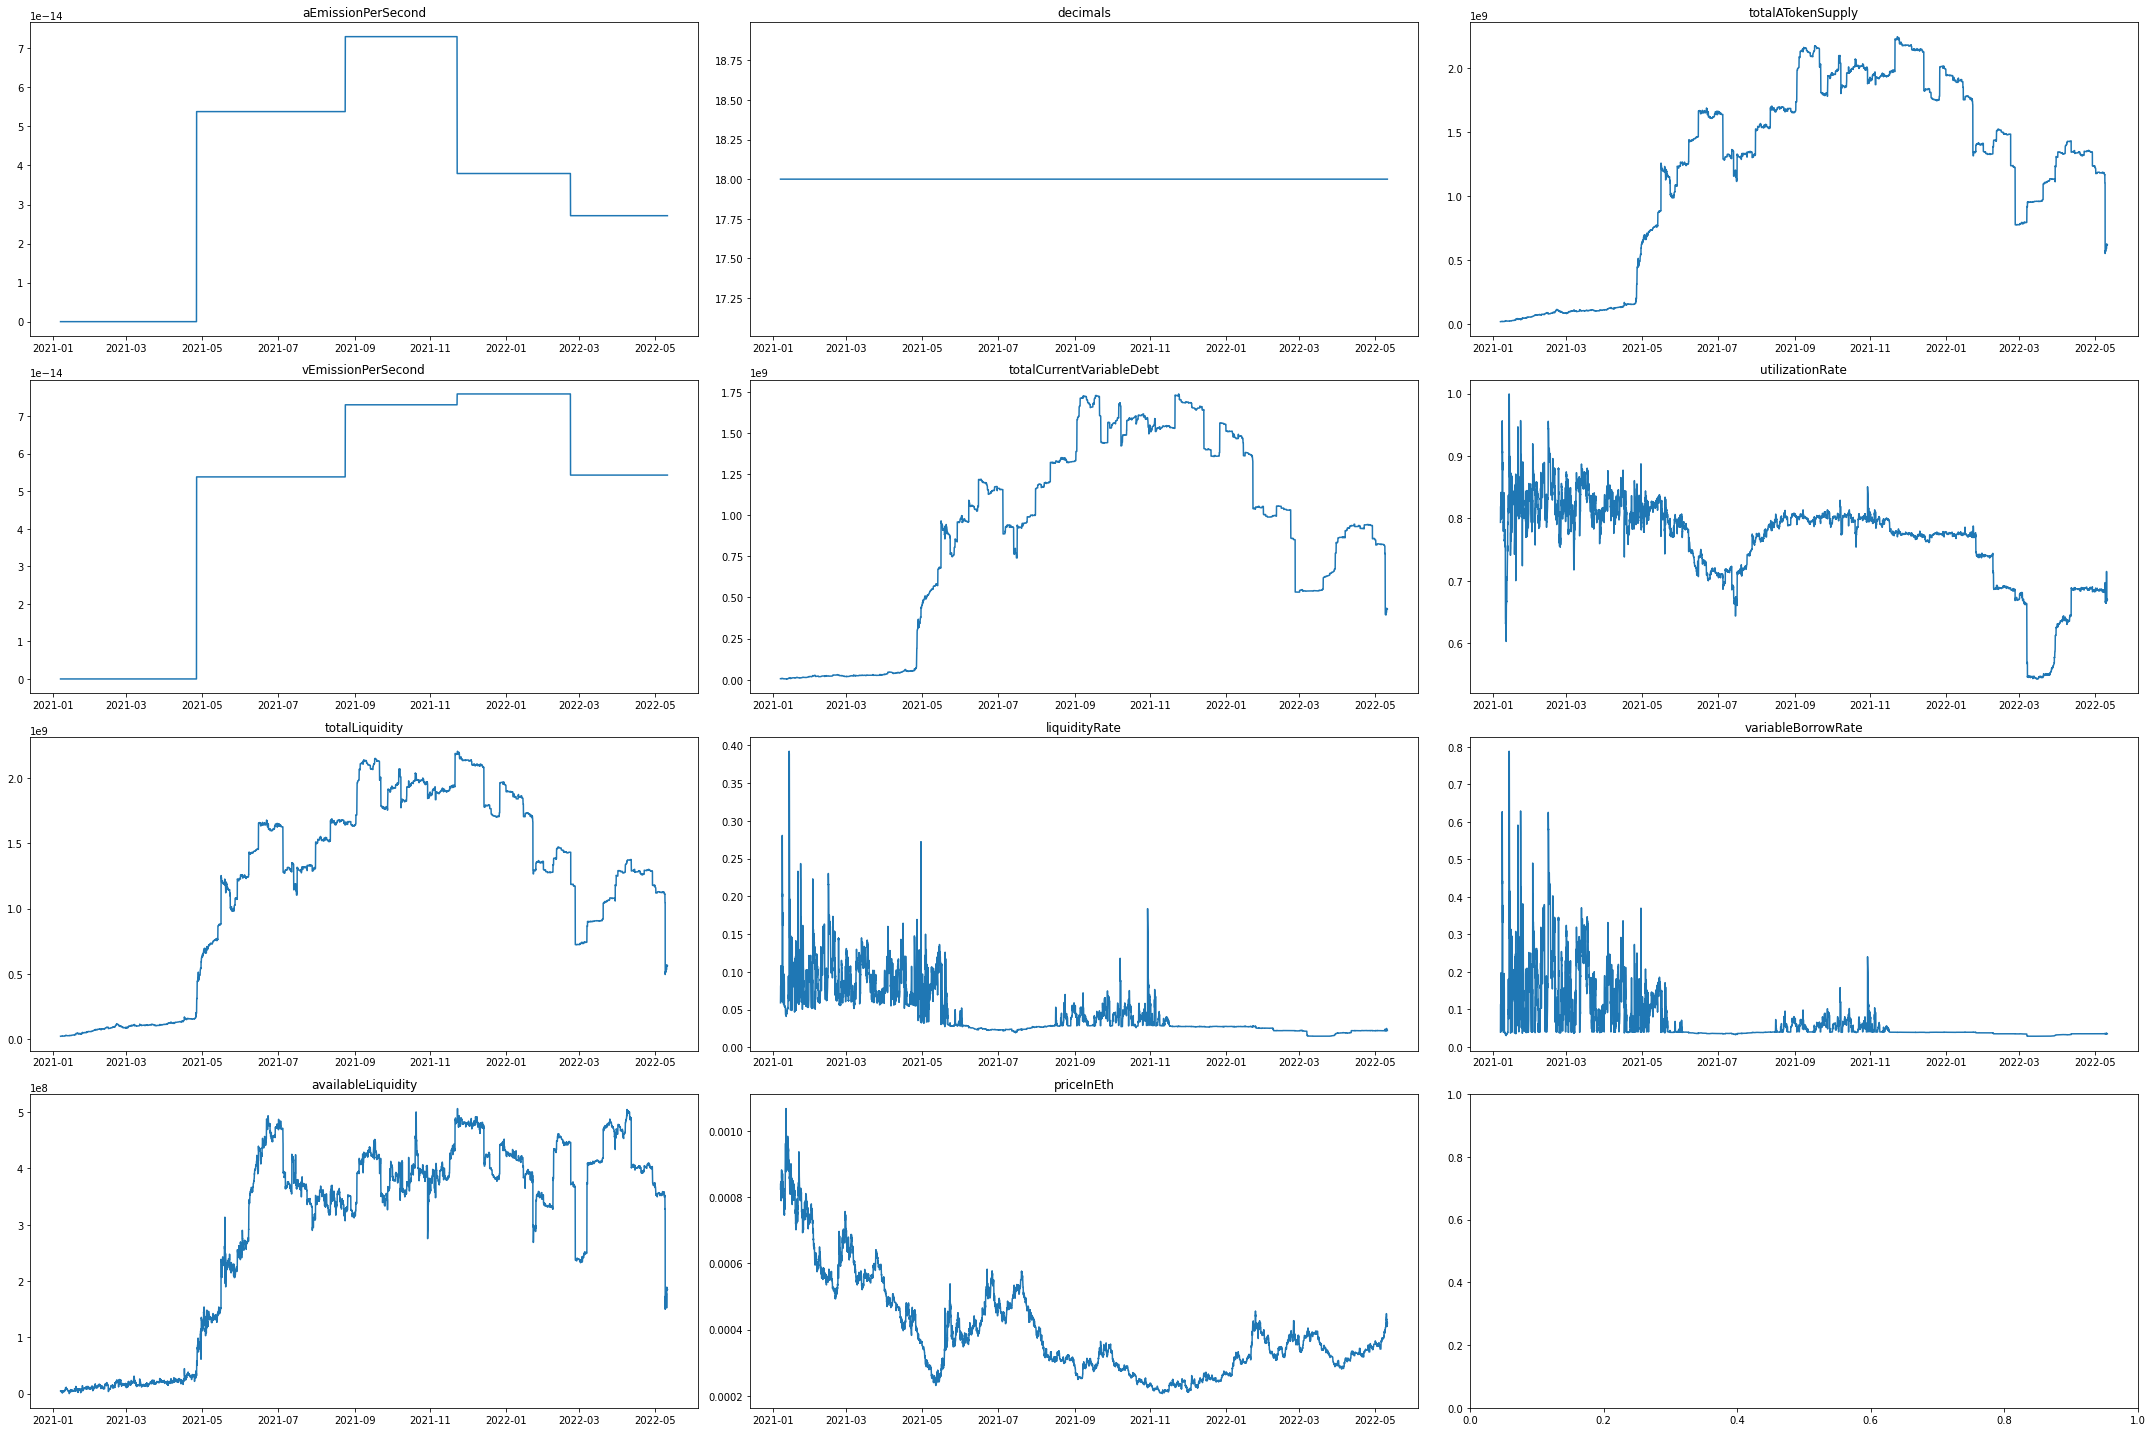

In [13]:
plot(df_dai)

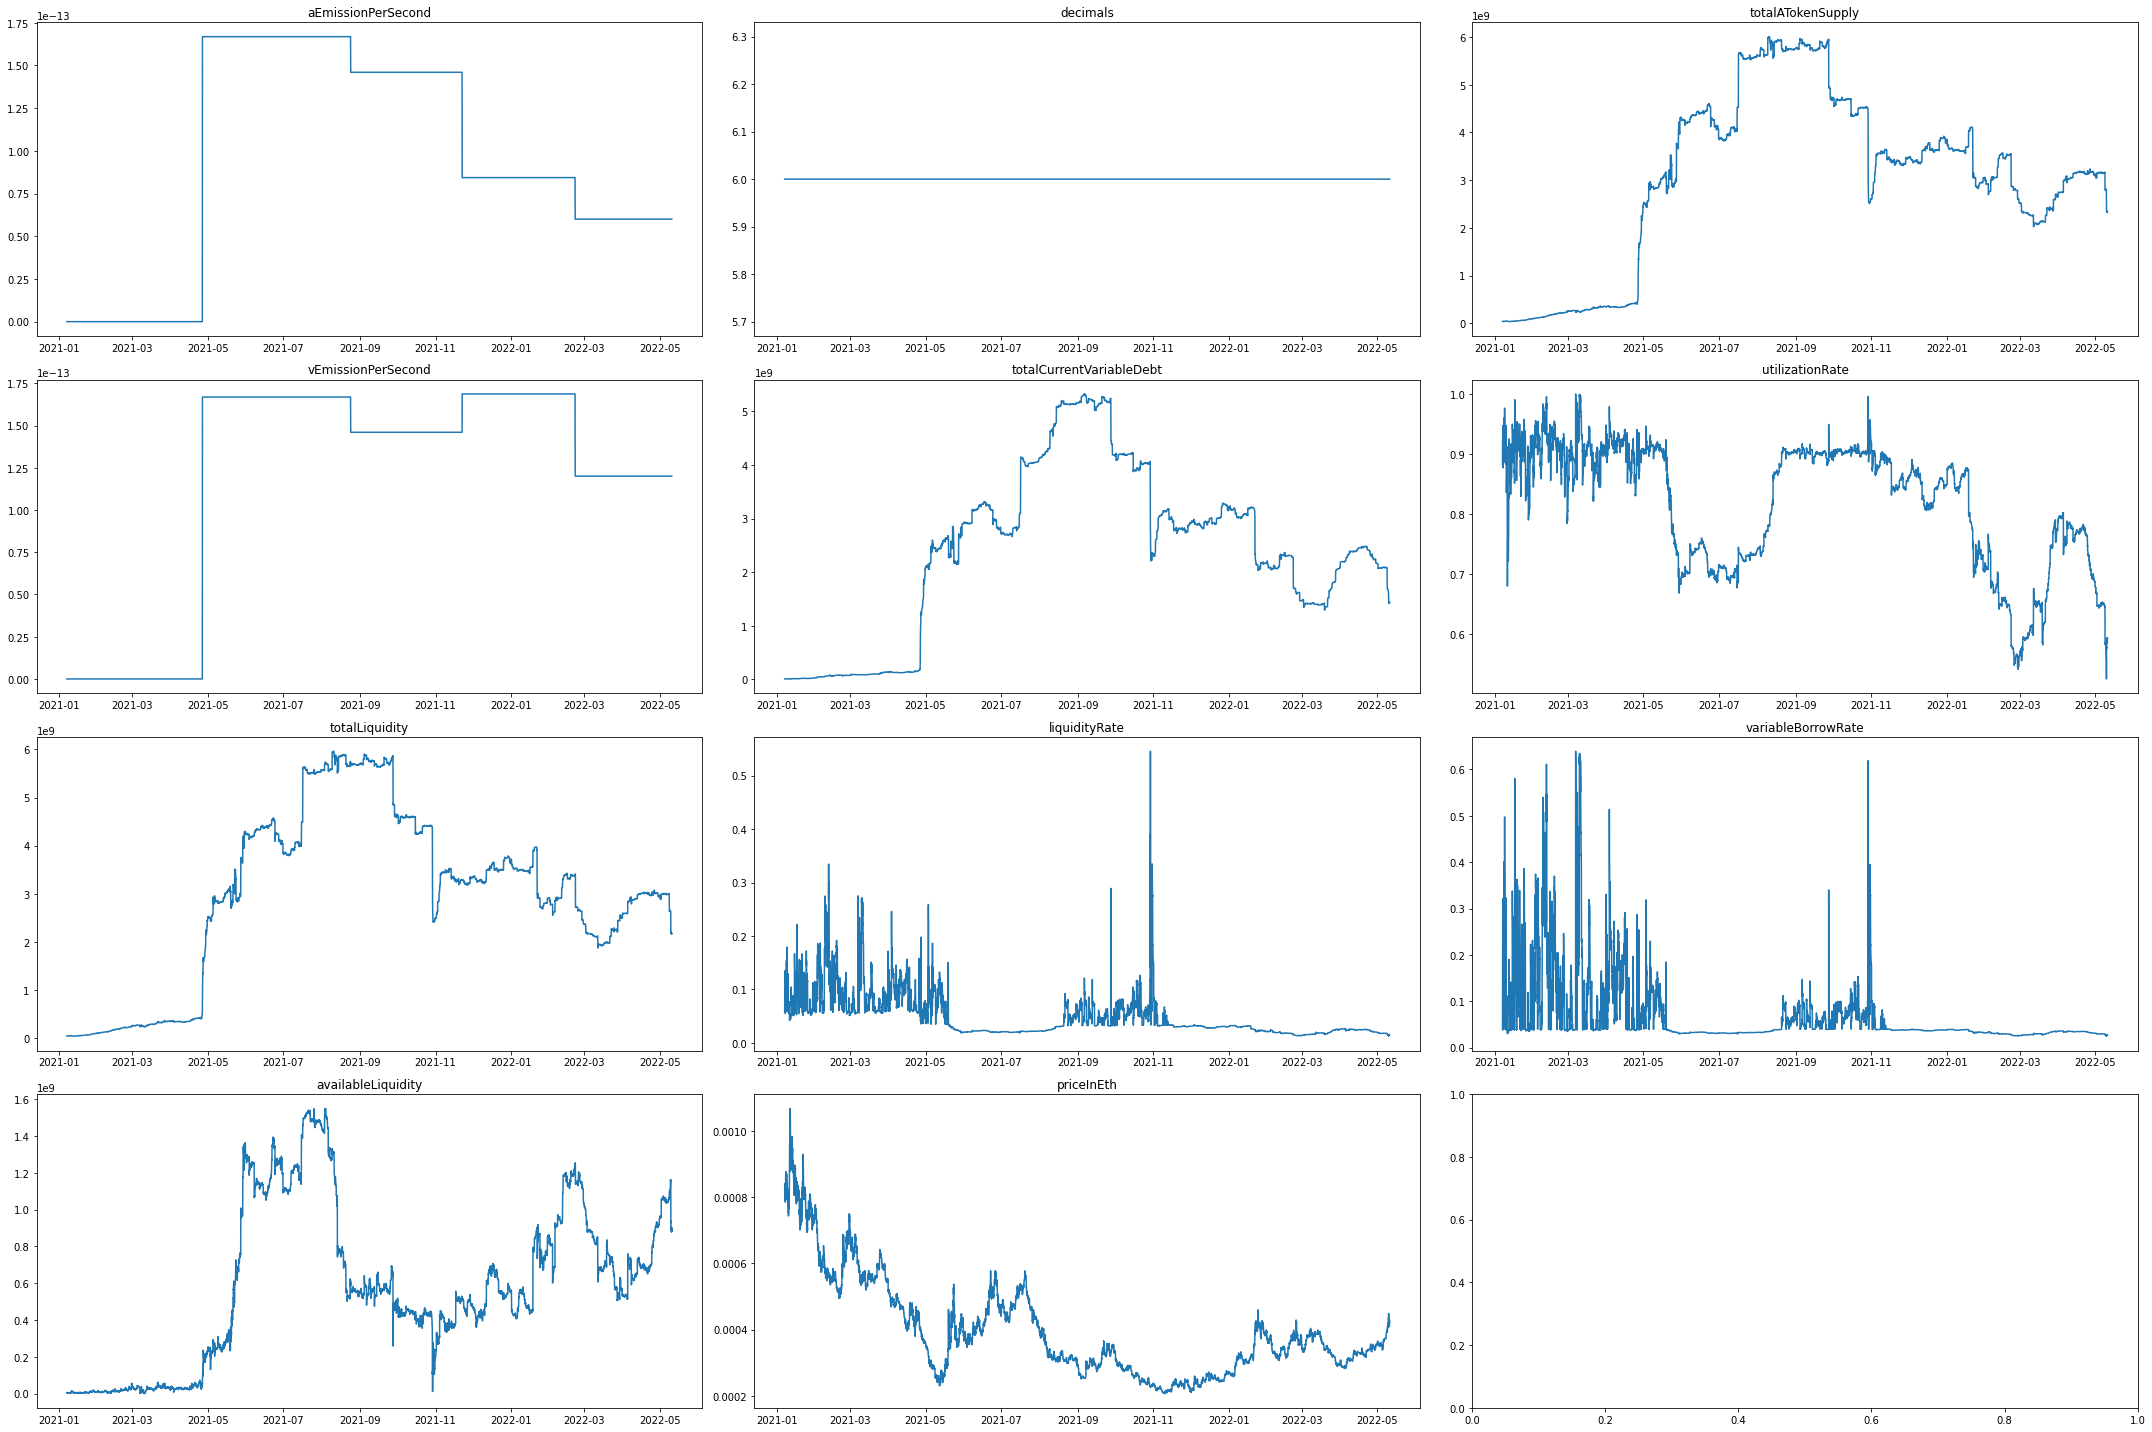

In [14]:
plot(df_usdc)

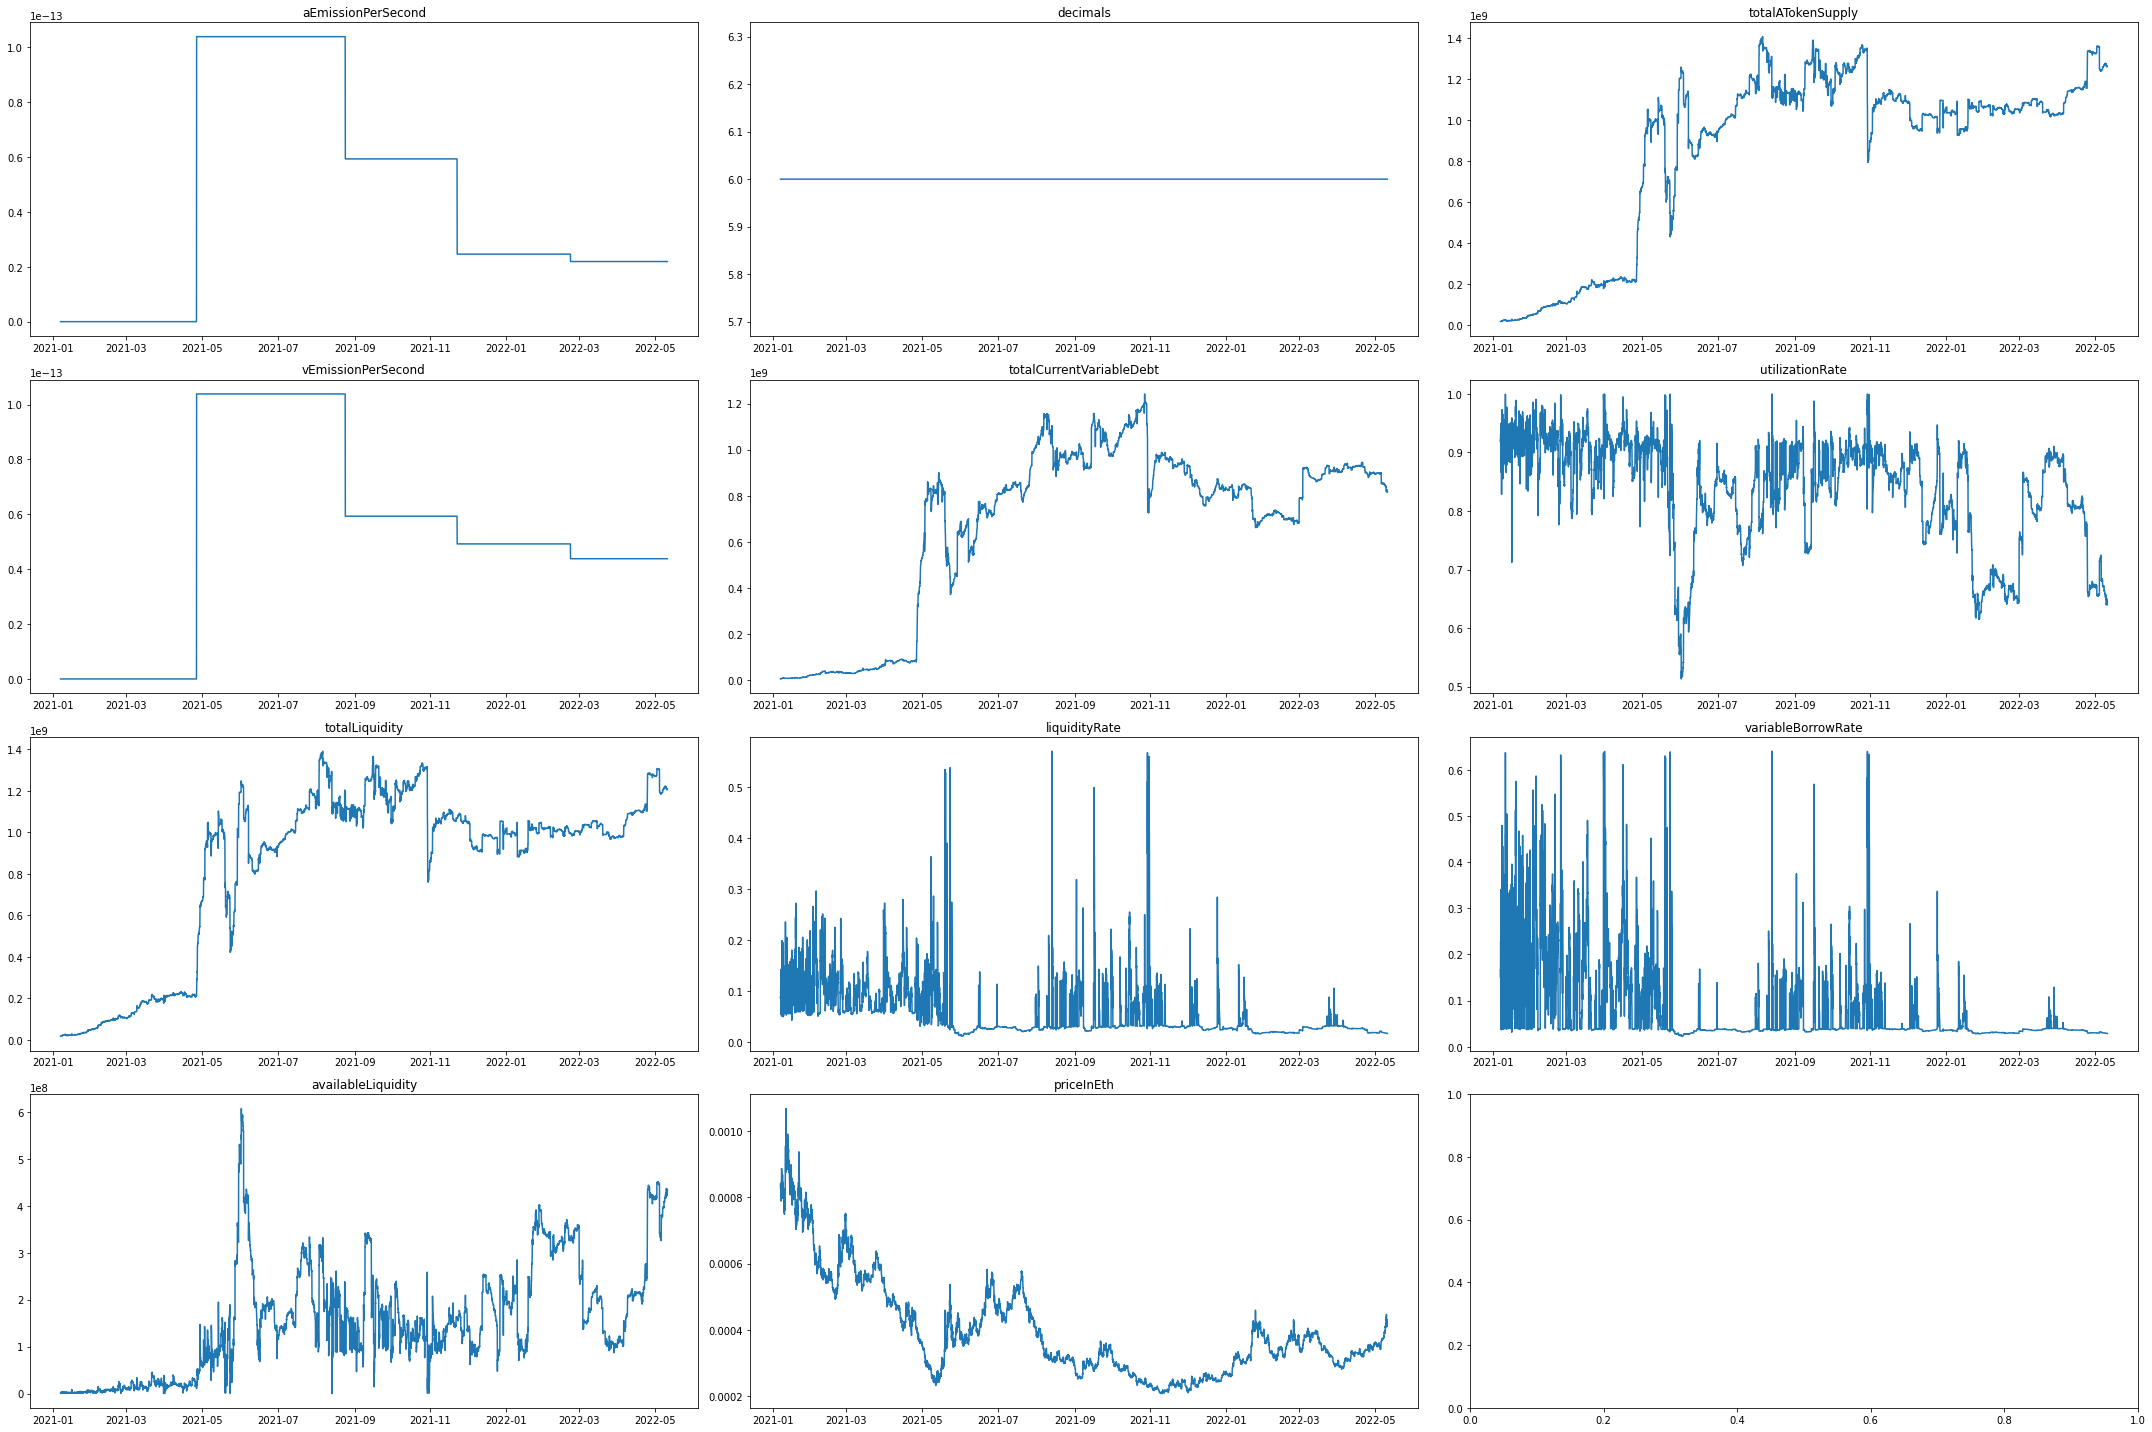

In [15]:
plot(df_usdt)

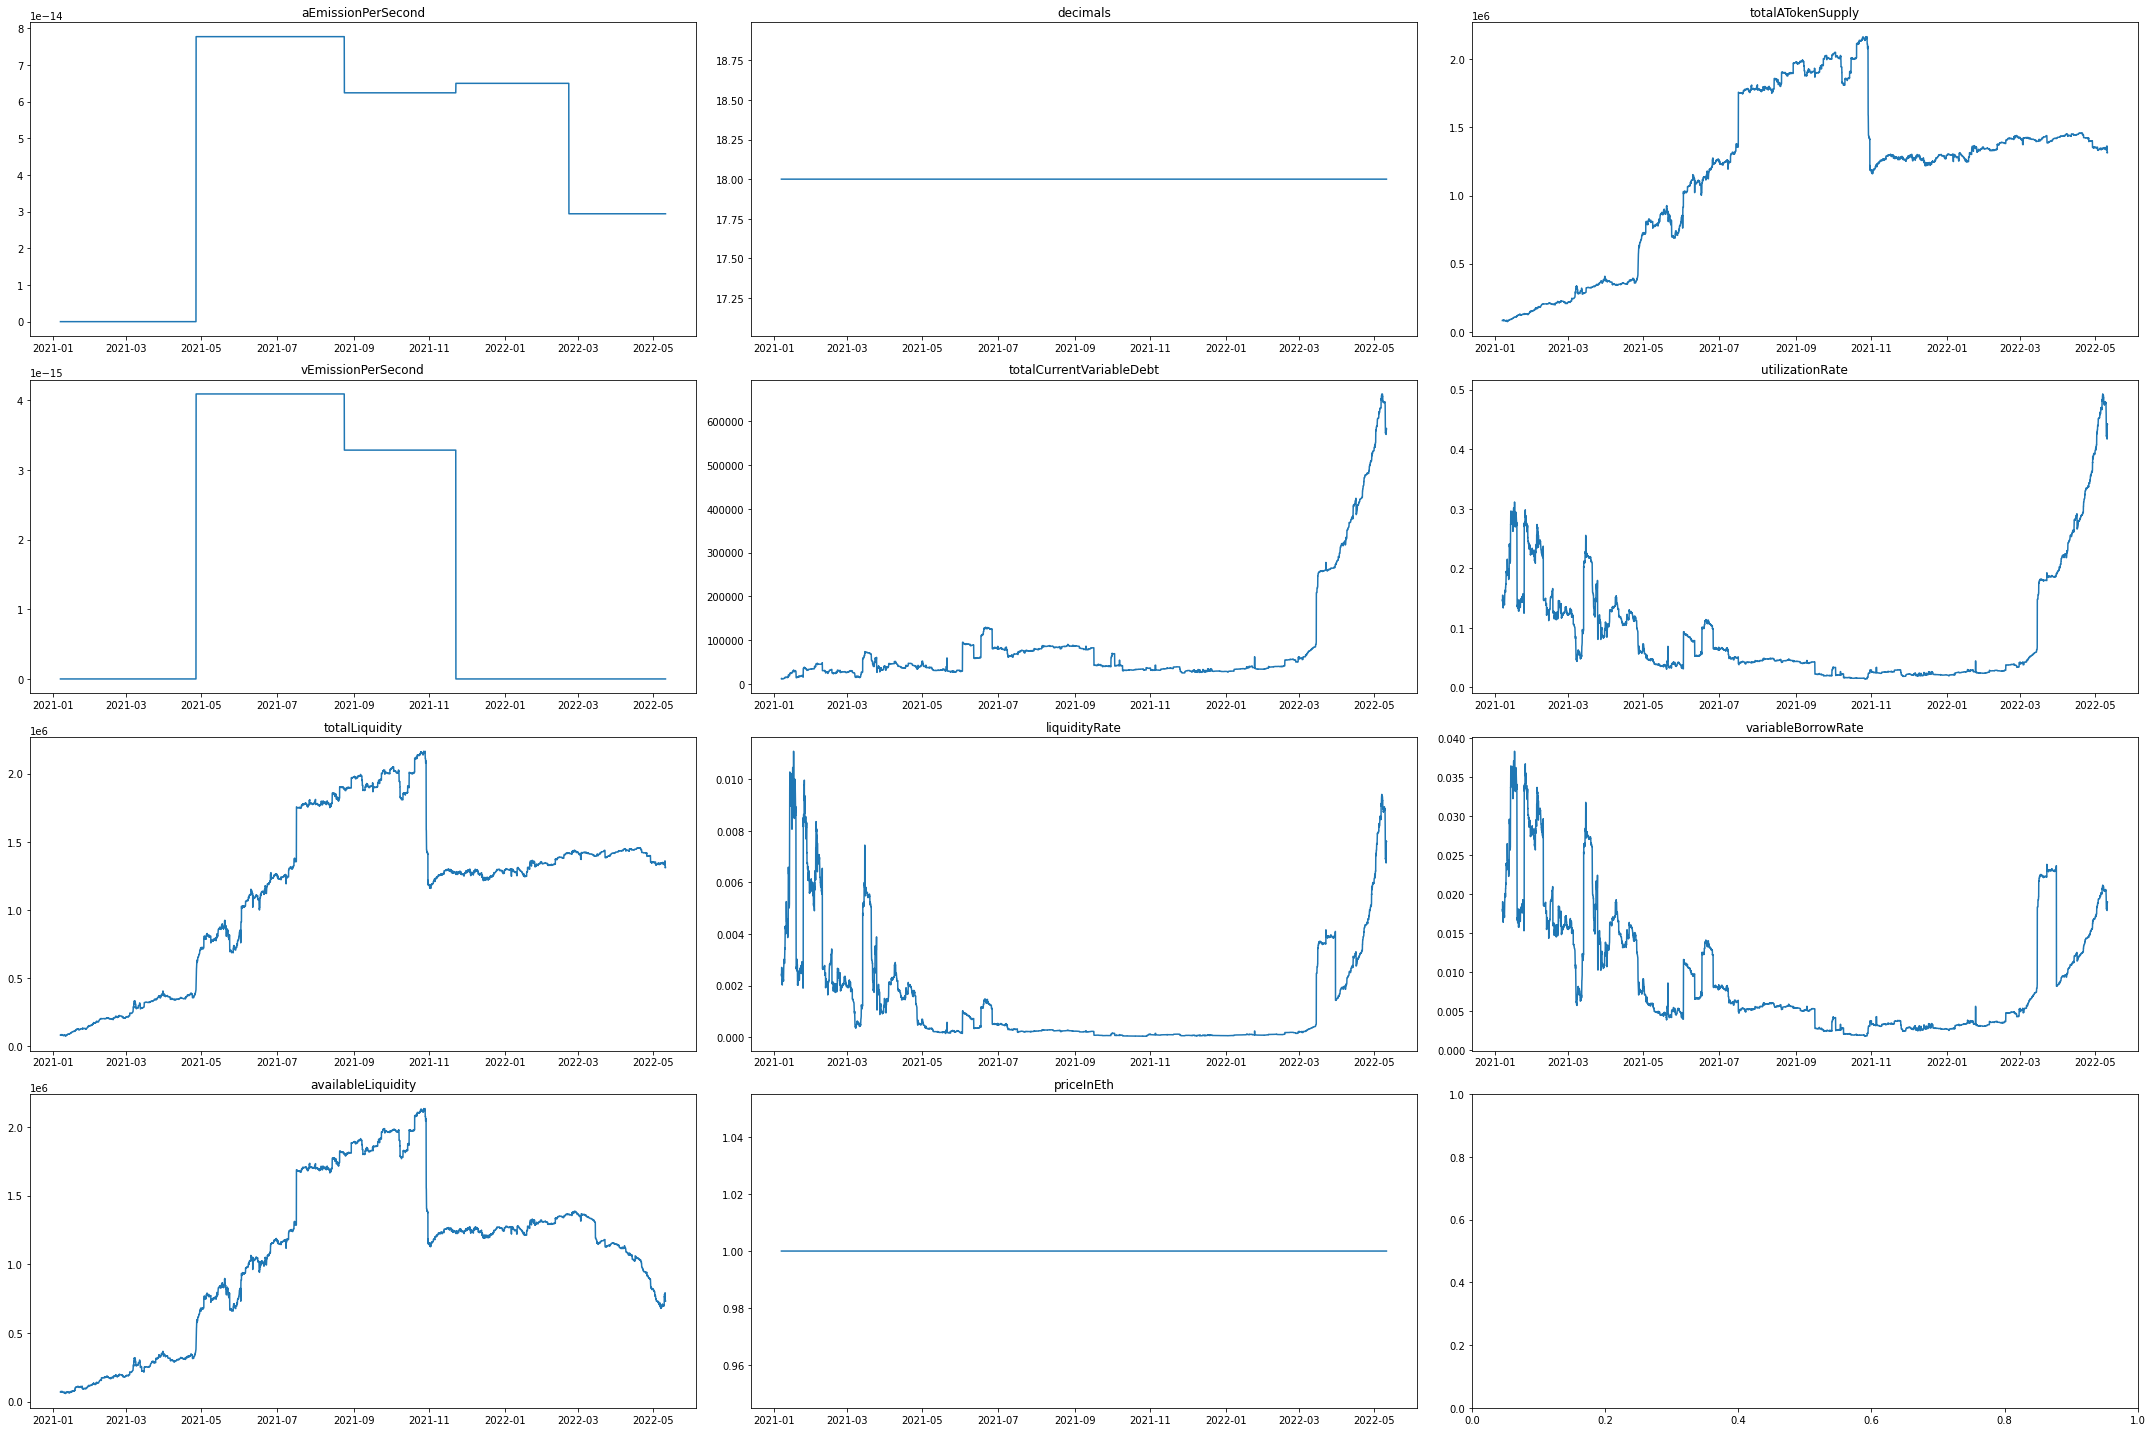

In [16]:
plot(df_eth)

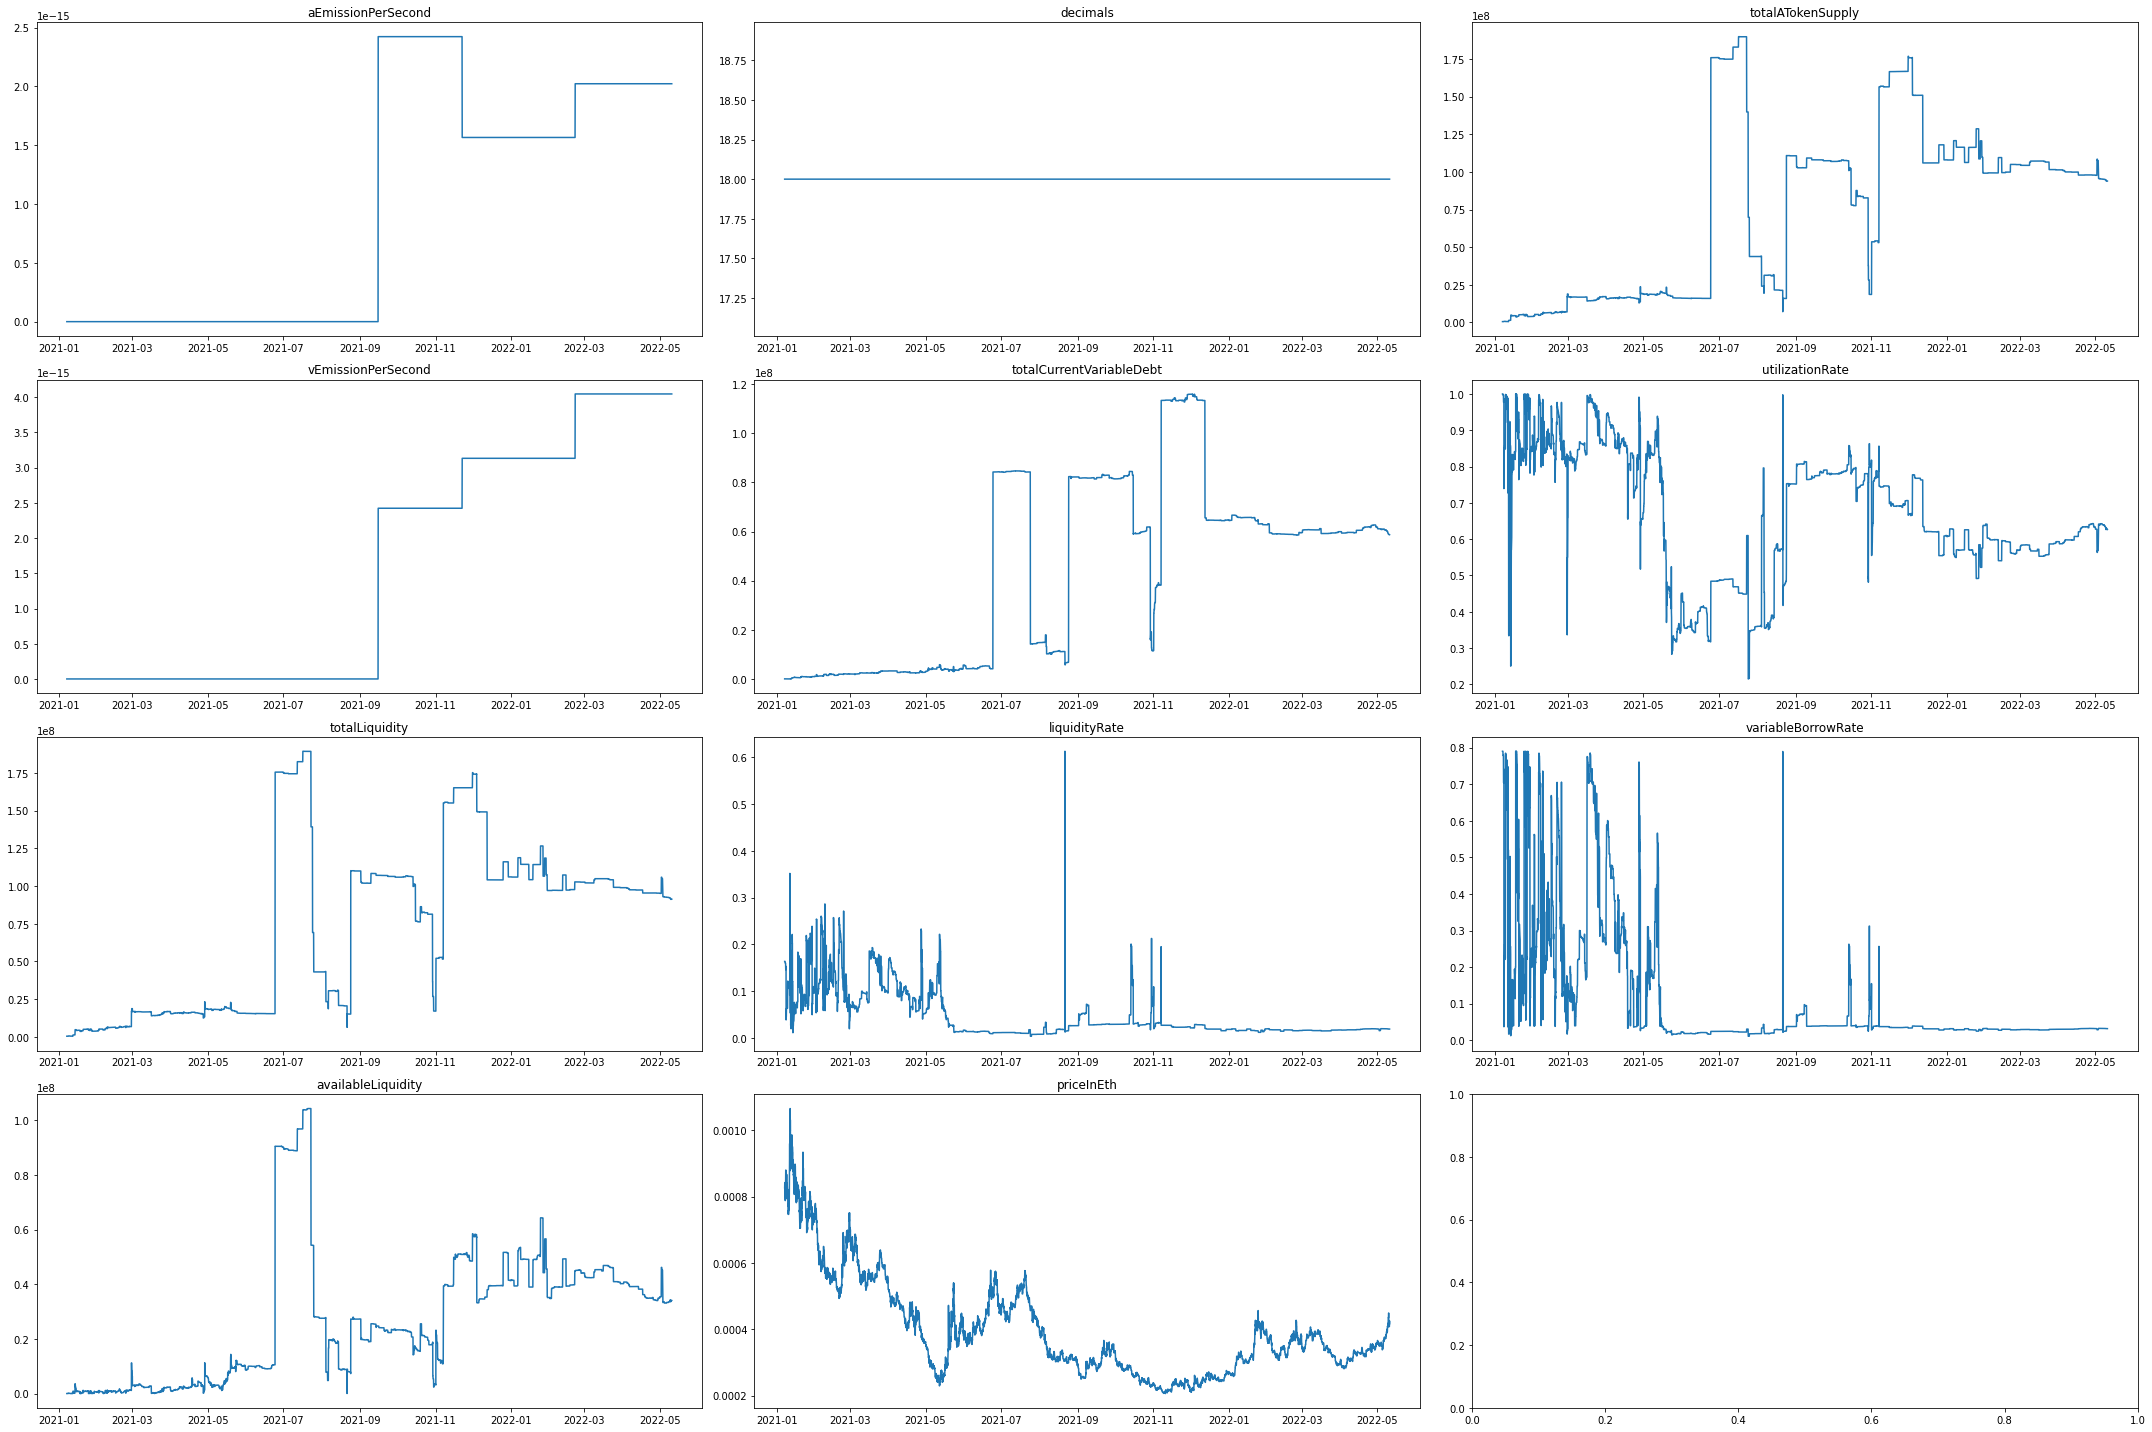

In [17]:
plot(df_tusd)

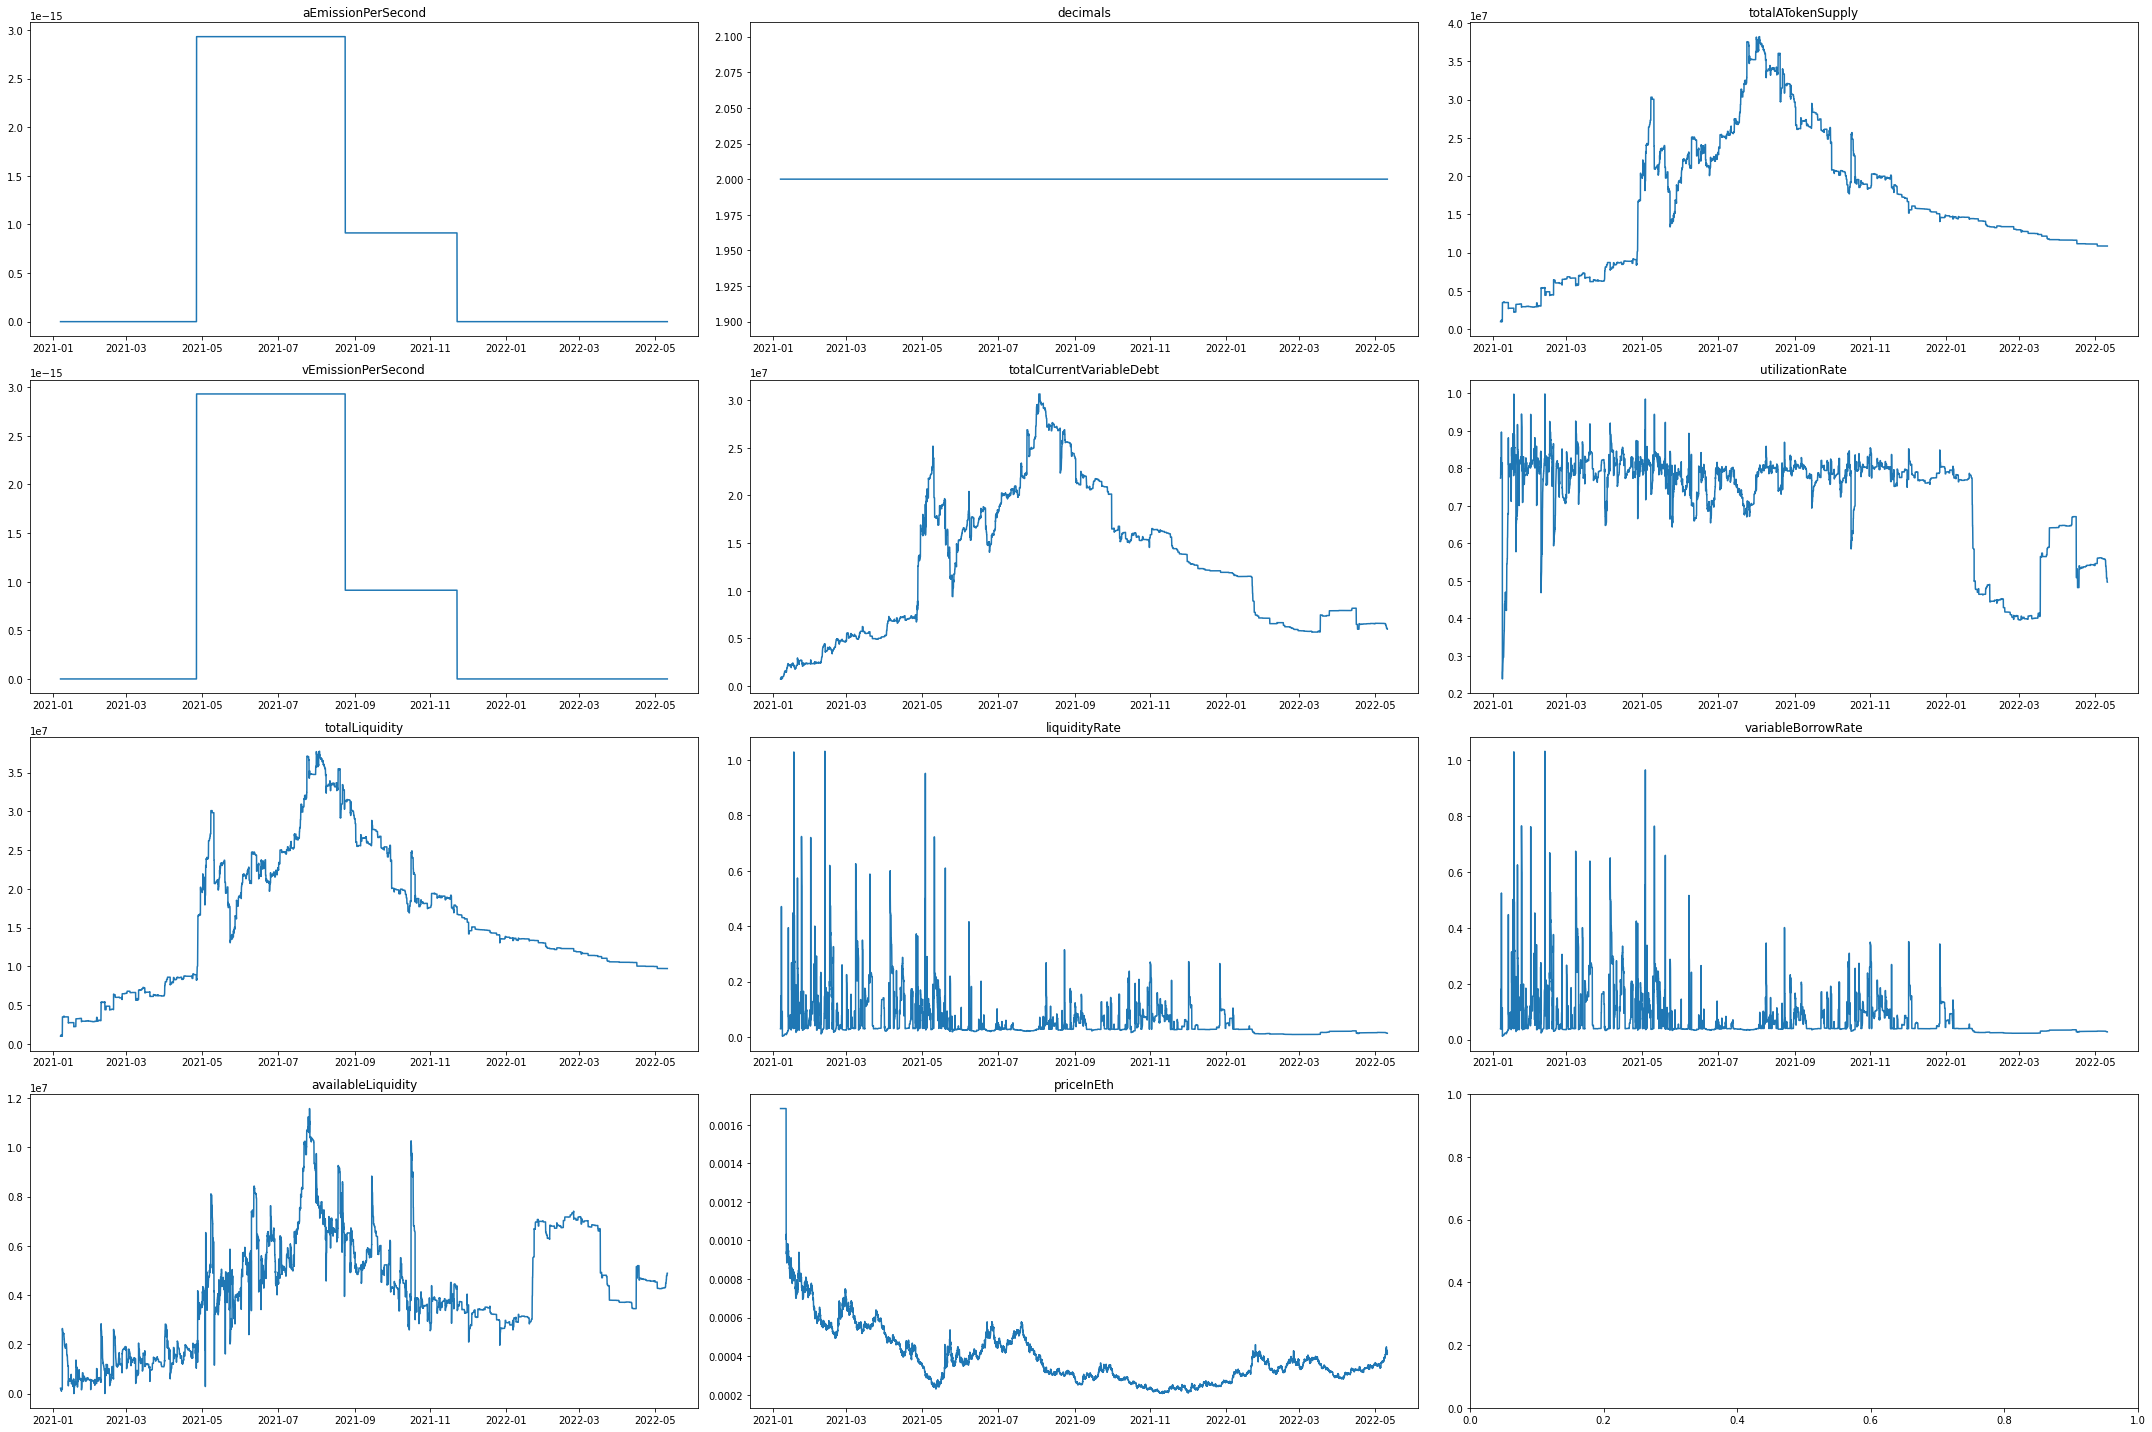

In [18]:
plot(df_gusd)

In [19]:
df.columns

Index(['id', 'symbol', 'aEmissionPerSecond', 'decimals', 'totalATokenSupply',
       'vEmissionPerSecond', 'totalCurrentVariableDebt', 'utilizationRate',
       'totalLiquidity', 'liquidityRate', 'variableBorrowRate',
       'availableLiquidity', 'Timestamp', 'priceInEth', 'pool_id', 'datetime'],
      dtype='object')

## Correlation of underlying's borrowrate and supplyrate

In [20]:
df_dai['variableBorrowRate'].corr(df_dai['liquidityRate'])

0.9440490329262724

In [21]:
df_usdc['variableBorrowRate'].corr(df_usdc['liquidityRate'])

0.9373529280398023

In [22]:
df_usdt['variableBorrowRate'].corr(df_usdt['liquidityRate'])

0.9291166822675685

In [23]:
df_eth['variableBorrowRate'].corr(df_eth['liquidityRate'])

0.9099915169876949

In [24]:
df_tusd['variableBorrowRate'].corr(df_tusd['liquidityRate'])

0.9317031928510313

In [25]:
df_gusd['variableBorrowRate'].corr(df_gusd['liquidityRate'])

0.9963805040684135

In [26]:
df1 = pd.DataFrame()
for tok in df.symbol.unique():
    df_tok = df[df['symbol']==tok]
    df_tok = df_tok.drop(['symbol', 'datetime'], axis=1)

    col_names = []
    for col in df_tok.columns:
        if col == 'Timestamp':
            col_names.append(f'{col}')
        else:
            col_names.append(f'{tok}_{col}')
        
    df_tok.columns = col_names
    #df_tok = df_tok.set_index('Timestamp', drop=True)
    
    if df1.empty:
        df1 = df_tok
    else:
        df1 = pd.merge(df1, df_tok, on='Timestamp')

In [27]:
len(df1.columns)

79

In [28]:
df1.columns

Index(['WETH_id', 'WETH_aEmissionPerSecond', 'WETH_decimals',
       'WETH_totalATokenSupply', 'WETH_vEmissionPerSecond',
       'WETH_totalCurrentVariableDebt', 'WETH_utilizationRate',
       'WETH_totalLiquidity', 'WETH_liquidityRate', 'WETH_variableBorrowRate',
       'WETH_availableLiquidity', 'Timestamp', 'WETH_priceInEth',
       'WETH_pool_id', 'USDC_id', 'USDC_aEmissionPerSecond', 'USDC_decimals',
       'USDC_totalATokenSupply', 'USDC_vEmissionPerSecond',
       'USDC_totalCurrentVariableDebt', 'USDC_utilizationRate',
       'USDC_totalLiquidity', 'USDC_liquidityRate', 'USDC_variableBorrowRate',
       'USDC_availableLiquidity', 'USDC_priceInEth', 'USDC_pool_id', 'DAI_id',
       'DAI_aEmissionPerSecond', 'DAI_decimals', 'DAI_totalATokenSupply',
       'DAI_vEmissionPerSecond', 'DAI_totalCurrentVariableDebt',
       'DAI_utilizationRate', 'DAI_totalLiquidity', 'DAI_liquidityRate',
       'DAI_variableBorrowRate', 'DAI_availableLiquidity', 'DAI_priceInEth',
       'DAI_pool_id'

In [30]:
selcols =['WETH_totalATokenSupply', 'WETH_totalCurrentVariableDebt', 'WETH_utilizationRate',
          'WETH_totalLiquidity', 'WETH_liquidityRate', 'WETH_variableBorrowRate',
          'WETH_availableLiquidity', 

          'USDC_totalATokenSupply', 'USDC_totalCurrentVariableDebt', 'USDC_utilizationRate',
          'USDC_totalLiquidity', 'USDC_liquidityRate', 'USDC_variableBorrowRate',
          'USDC_availableLiquidity', 

          'DAI_totalATokenSupply', 'DAI_totalCurrentVariableDebt', 'DAI_utilizationRate', 
          'DAI_totalLiquidity', 'DAI_liquidityRate', 'DAI_variableBorrowRate', 
          'DAI_availableLiquidity', 

          'USDT_totalATokenSupply', 'USDT_totalCurrentVariableDebt', 'USDT_utilizationRate',
          'USDT_totalLiquidity', 'USDT_liquidityRate', 'USDT_variableBorrowRate',
          'USDT_availableLiquidity', 

          'TUSD_totalATokenSupply','TUSD_totalCurrentVariableDebt', 'TUSD_utilizationRate', 
          'TUSD_totalLiquidity', 'TUSD_liquidityRate', 'TUSD_variableBorrowRate', 
          'TUSD_availableLiquidity', 
          
          'GUSD_totalATokenSupply', 'GUSD_totalCurrentVariableDebt', 'GUSD_utilizationRate',
          'GUSD_totalLiquidity', 'GUSD_liquidityRate', 'GUSD_variableBorrowRate',
          'GUSD_availableLiquidity']

In [31]:
df1 = df1[selcols]

In [32]:
import seaborn as sns

In [37]:
cols = ['WETH_variableBorrowRate', 'USDC_variableBorrowRate', 'DAI_variableBorrowRate', 'USDT_variableBorrowRate', 'TUSD_variableBorrowRate', 'GUSD_variableBorrowRate']

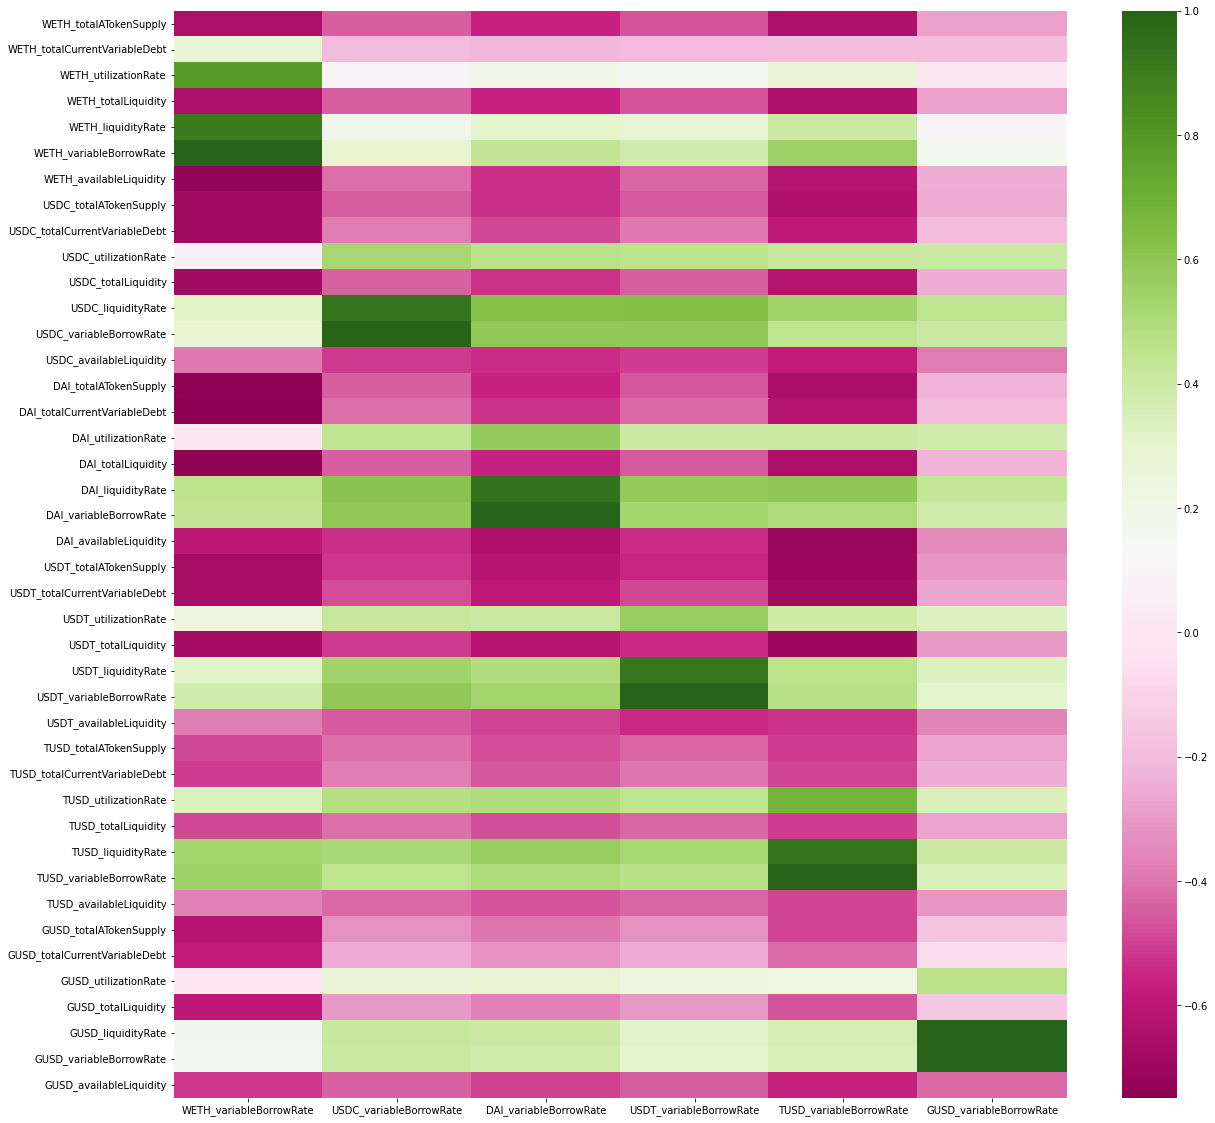

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr().loc[:,cols], cmap="PiYG")